# Machine Learning com Scikit-Learn

In [2]:
# Versão da linguagem Python para este projeto
from platform import python_version
print('Versão:', python_version())

Versão: 3.9.12


In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Carregando os dados

In [9]:
# Carrega o dataset
df_dsa = pd.read_csv('dataset.csv')

In [10]:
df_dsa.shape

(500, 2)

In [11]:
df_dsa.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [12]:
df_dsa.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [13]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# Análise Exploratória - Resumo Estatístico

In [14]:
# Verifica se há valores ausentes
df_dsa.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [15]:
# Correlação
df_dsa.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [16]:
# Resumo estatístico do dataset
df_dsa.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [17]:
# Resumo estatístico da variável preditora
df_dsa["horas_estudo_mes"].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

In [18]:
# Resumo estatístico da variável preditora
df_dsa["horas_estudo_mes"].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

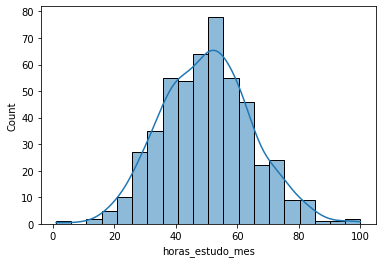

In [19]:
# Histograma da variável preditora
sns.histplot(data = df_dsa, x = "horas_estudo_mes", kde = True)

# Preparação dos Dados

In [20]:
# Prepara a variável de entrada X
x = np.array(df_dsa['horas_estudo_mes'])

In [21]:
type(x)

numpy.ndarray

In [22]:
# Ajusta o shape de x
x = np.array(df_dsa['horas_estudo_mes'])

In [23]:
type(x)

numpy.ndarray

In [24]:
# Ajusta o shape de x
x = x.reshape(-1, 1)

In [25]:
# Prepara a variável alvo
y = df_dsa['salario']

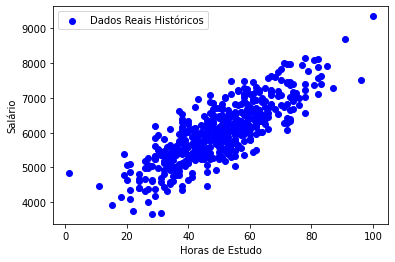

In [26]:
# Gráfico de dispersão entre X e Y
plt.scatter(x, y, color = "blue", label = "Dados Reais Históricos")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [27]:
# Dividir dados em treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [28]:
x_treino.shape

(400, 1)

In [29]:
x_teste.shape

(100, 1)

In [30]:
y_treino.shape

(400,)

In [31]:
y_teste.shape

(100,)

# Modelagem Preditiva (Machine Learning)

In [32]:
# Cria o modelo de regressão linear simples
modelo = LinearRegression()

In [33]:
# Treina o modelo
modelo.fit(x_treino, y_treino)

LinearRegression()

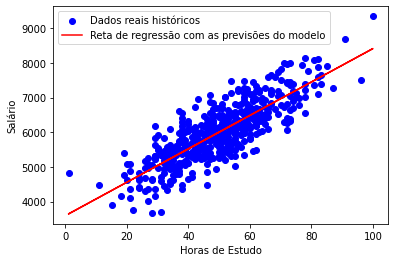

In [34]:
# Visualiza a reta de regressão linear (previsão) e os dados reais usados no treino
plt.scatter(x, y, color = "blue", label = "Dados reais históricos ")
plt.plot(x, modelo.predict(x), color = "red", label = "Reta de regressão com as previsões do modelo")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [35]:
# Avalia o modelo nos dados de teste
score = modelo.score(x_teste, y_teste)
print(f"Coeficiente R^2: {score:.2f}")

Coeficiente R^2: 0.59


In [36]:
# Intercepto - parâmetro w0
modelo.intercept_

3596.7837243727527

In [37]:
# Slope - parâmetro w1
modelo.coef_

array([48.18185277])

# Deploy do Modelo

### Usaremos o modelo para prever o salário com base nas horas de estudo

In [38]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[48]])

# Faz previsão com modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês, seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[48]] horas por mês, seu salário pode ser igual a [5909.5126574]


In [39]:
# Mesmo resultado anterior usando os parâmetros (coeficientes) aprendidos pelo modelo
salario = modelo.intercept_ + (modelo.coef_* horas_estudo_novo)
print(salario)

[[5909.5126574]]


In [40]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[65]])

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês, seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[65]] horas por mês, seu salário pode ser igual a [6728.60415452]
